In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()


Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_25976\2771334033.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,66,1083,97,0,1246.0\r\n1,2023-01-01 01:00:00,172,0,73,0,245.0\r\n2,2023-01-01 02:00:00,60,1088,47,0,1195.0\r\n3,2023-01-01 03:00:00,0,0,77,1031,1108.0\r\n4,2023-01-01 04:00:00,138,0,88,0,226.0\r\n5,2023-01-01 05:00:00,0,0,65,0,65.0\r\n6,2023-01-01 06:00:00,156,0,89,0,245.0\r\n7,2023-01-01 07:00:00,108,0,98,0,206.0\r\n8,2023-01-01 08:00:00,70,0,0,0,70.0\r\n9,2023-01-01 09:00:00,0,1704,0,0,1704.0\r\n10,2023-01-01 10:00:00,0,0,67,0,67.0\r\n11,2023-01-01 11:00:00,137,0,36,0,173.0\r\n12,2023-01-01 12:00:00,0,0,0,0,0.0\r\n13,2023-01-01 13:00:00,114,0,0,0,114.0\r\n14,2023-01-01 14:00:00,0,0,0,0,0.0\r\n15,2023-01-01 15:00:00,0,0,0,0,0.0\r\n16,2023-01-01 16:00:00,165,0,0,1026,1191.0\r\n17,2023-01-01 17:00:00,0,0,0,839,839.0\r\n18,2023-01-01 18:00:00,54,0,54,0,108.0\r\n19,2023-01-01 19:00:00,144,0,42,0,186.0\r\n20,2023-01-01 20:00:00,74,2435,0,0,2509.0\r\n21,2023-01-01 21:00:00,0,1089,0,0,1089.0\r\n22,2023-01-01 22:00:00

In [3]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw


,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,66,1083,97,0,1246.0
1,2023-01-01 01:00:00,172,0,73,0,245.0
2,2023-01-01 02:00:00,60,1088,47,0,1195.0
3,2023-01-01 03:00:00,0,0,77,1031,1108.0
4,2023-01-01 04:00:00,138,0,88,0,226.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,145,1231,71,0,1447.0
4317,2023-06-29 21:00:00,94,1195,33,0,1322.0
4318,2023-06-29 22:00:00,50,1963,56,0,2069.0
4319,2023-06-29 23:00:00,0,2261,26,0,2287.0


In [4]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    18
dtype: int64


In [5]:
df_raw[df_raw['total_power'].isna()].index

Index([ 170,  714,  915, 1041, 1236, 1757, 2109, 2789, 2915, 3094, 3341, 3443,
       3682, 3965, 4025, 4125, 4221, 4254],
      dtype='int64')

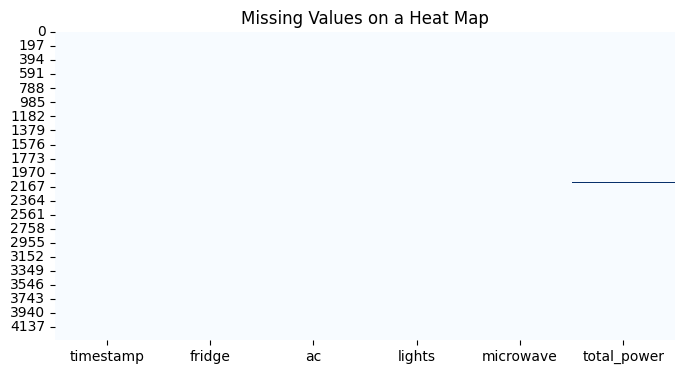

In [6]:
plt.figure(figsize=(8,4))
sns.heatmap(df_raw.isnull(),cbar=False,cmap='Blues')
plt.title("Missing Values on a Heat Map")
plt.show()

In [7]:
df_clean = df_raw.fillna(method='ffill')
df_clean.to_csv("Clean-Data",index = False)

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_25976\332814519.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_raw.fillna(method='ffill')


In [8]:
df_clean[df_clean['total_power'].isna()].index

Index([], dtype='int64')

In [9]:
df_daily = df_clean.resample('D').mean()

df_weekly_sum = df_clean.resample('W').sum()

print("Daily resampled Shape", df_daily.shape)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [10]:
df = pd.read_csv('Clean-Data')
df

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,66,1083,97,0,1246.0
1,2023-01-01 01:00:00,172,0,73,0,245.0
2,2023-01-01 02:00:00,60,1088,47,0,1195.0
3,2023-01-01 03:00:00,0,0,77,1031,1108.0
4,2023-01-01 04:00:00,138,0,88,0,226.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,145,1231,71,0,1447.0
4317,2023-06-29 21:00:00,94,1195,33,0,1322.0
4318,2023-06-29 22:00:00,50,1963,56,0,2069.0
4319,2023-06-29 23:00:00,0,2261,26,0,2287.0


In [11]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [12]:
df.set_index('timestamp',inplace=True)

In [13]:
df_daily = df.resample('D').mean()

df_weekly_sum = df.resample('W').sum()

# print("Daily resampled Shape", df_daily)
df_daily.to_csv('timed-data',index=True)
df_daily.head()



,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,71.208333,308.291667,39.916667,120.666667,540.083333
2023-01-02,102.958333,209.291667,32.000000,0.000000,344.250000
2023-01-03,54.958333,52.208333,25.541667,0.000000,132.708333
2023-01-04,72.750000,183.625000,26.041667,0.000000,282.416667
2023-01-05,79.041667,244.166667,25.541667,0.000000,348.750000


In [14]:
df_weekly_sum = df.resample('W').sum()

df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,1709,7399,958,2896,12962.0
2023-01-08,13598,30199,4735,7846,53976.0
2023-01-15,15056,36918,4915,4390,61279.0
2023-01-22,14154,27215,5779,11353,58501.0
2023-01-29,16205,30863,5503,10159,62730.0
2023-02-05,15007,50122,5429,10649,81077.0
2023-02-12,13254,25405,5230,6569,50454.0
2023-02-19,13826,32341,4808,12440,64533.0
2023-02-26,15946,40255,5091,7593,69006.0


In [17]:
df
df_clean

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,66,1083,97,0,1246.0
1,2023-01-01 01:00:00,172,0,73,0,245.0
2,2023-01-01 02:00:00,60,1088,47,0,1195.0
3,2023-01-01 03:00:00,0,0,77,1031,1108.0
4,2023-01-01 04:00:00,138,0,88,0,226.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,145,1231,71,0,1447.0
4317,2023-06-29 21:00:00,94,1195,33,0,1322.0
4318,2023-06-29 22:00:00,50,1963,56,0,2069.0
4319,2023-06-29 23:00:00,0,2261,26,0,2287.0


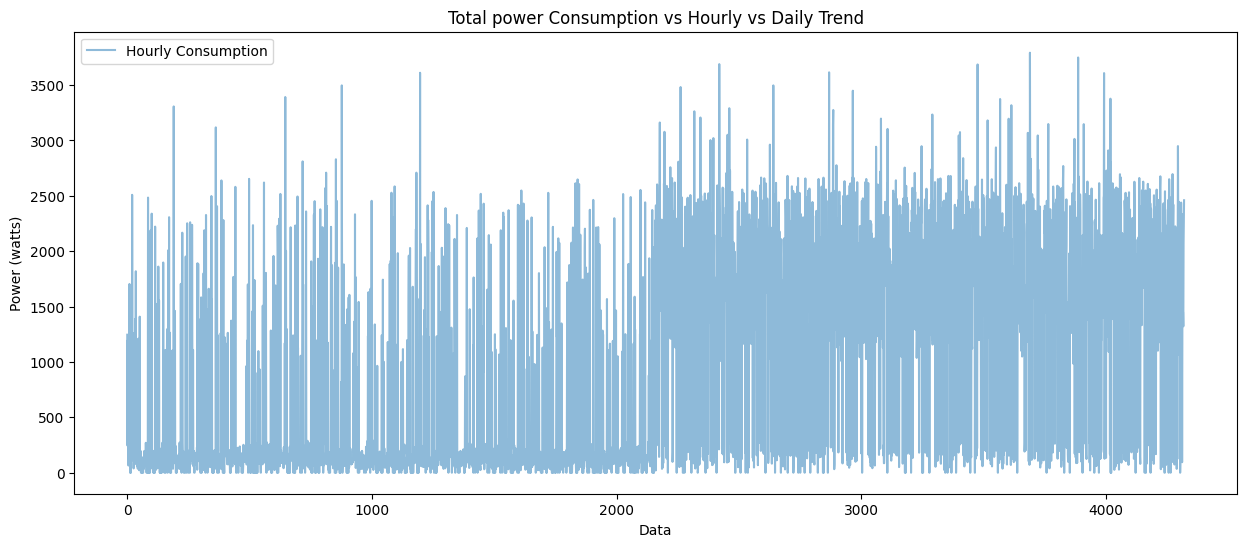

In [22]:
plt.figure(figsize=(15,6))
plt.plot(df_clean.index,df_clean['total_power'],label="Hourly Consumption", alpha = 0.5)
# plt.plot(df_clean.index,df_clean['total_power'],label="Daily Moving Average",color="red", alpha = 0.5)
plt.title("Total power Consumption vs Hourly vs Daily Trend")
plt.xlabel("Data")
plt.ylabel("Power (watts)")
plt.legend()
plt.show()

In [26]:
avg_consumption = df_clean[['fridge','ac','lights','microwave']].mean()
avg_consumption



fridge        85.731312
ac           805.147188
lights        31.432307
microwave     50.733858
dtype: float64

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_25976\145540252.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


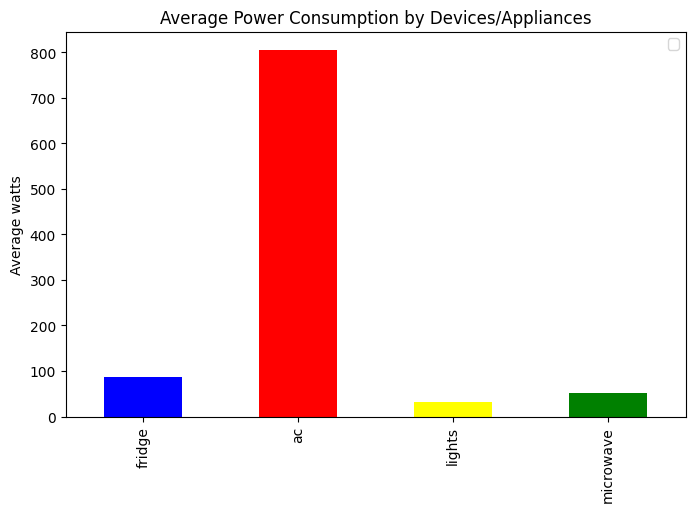

In [29]:
plt.figure(figsize = (8,5))
avg_consumption.plot(kind="bar",color = ['blue','red','yellow','green'])
plt.title("Average Power Consumption by Devices/Appliances")
plt.ylabel("Average watts")
plt.legend()
plt.show()

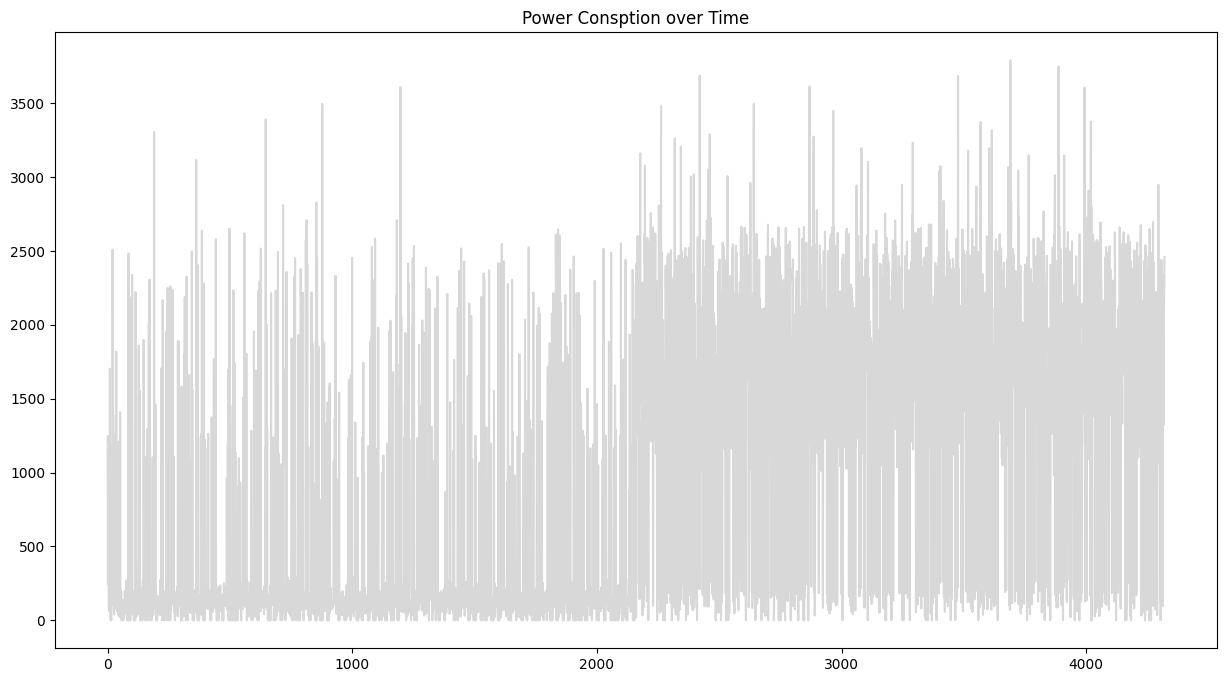

In [30]:
plt.figure(figsize=(15,8))
plt.plot(df_clean.index, df_clean['total_power'],alpha=0.3,color = "gray", label = "Power Consumption Hourly") 
plt.title("Power Consption over Time")
plt.show()